## Part 2 c) Multilayer Perceptron - UnderSampling

#### 1. load clean data

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np

DATAFILE1 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_UnderSample_train.csv'
a3train = pd.read_csv(DATAFILE1)
a3train = a3train[[col for col in a3train.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]
a3train.head()

,Field_info2,Field_info4,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info1,Personal_info2,...,Property_3_Q,Property_3_R,Property_3_S,Geo_5_CA,Geo_5_IL,Geo_5_NJ,Geo_5_TX,Quote_Year,Quote_Month,Quote_Flag
0,1.042384,0,2.869871,0.161749,1,0.793684,1.430736,1.086410,0,0.757145,...,1,0,0,0,0,0,1,-1.070547,-0.589215,0
1,1.679706,0,-0.538132,0.161749,1,0.793684,-0.475199,-1.300374,0,1.500418,...,0,1,0,0,0,1,0,1.684170,1.777352,0
2,0.815541,0,-0.896869,0.161749,1,-1.252022,0.954253,-1.665920,0,-1.175365,...,0,1,0,0,0,1,0,0.306811,0.594068,0
3,0.831744,0,-0.538132,-3.910702,1,-2.274875,-1.745822,0.726704,0,-1.175365,...,0,0,0,0,0,0,1,-1.070547,-0.293394,0
4,0.053995,0,1.434923,0.161749,1,-1.252022,0.954253,1.554985,0,-0.432092,...,0,0,0,1,0,0,0,-1.070547,1.185710,0


#### 2. parameter optimization `GridSearchCV`

In [3]:
X_train, y_train = a3train.iloc[:,:-1], a3train.iloc[:,-1]

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

hidden_layer_sizes = [(3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5), (5, 3), (5, 4), (5, 5), (3, 3, 3), (3, 3, 4), (3, 3, 5), (3, 4, 3), (3, 4, 4), (3, 4, 5), (3, 5, 3), (3, 5, 4), (3, 5, 5), (4, 3, 3), (4, 3, 4), (4, 3, 5), (4, 4, 3), (4, 4, 4), (4, 4, 5), (4, 5, 3), (4, 5, 4), (4, 5, 5), (5, 3, 3), (5, 3, 4), (5, 3, 5), (5, 4, 3), (5, 4, 4), (5, 4, 5), (5, 5, 3), (5, 5, 4), (5, 5, 5)]
activation = ['logistic','relu']
max_iter = [1000]

est_model = MLPClassifier()
random_grid = {'hidden_layer_sizes': hidden_layer_sizes, 
                'activation': activation,
               'max_iter':max_iter
              }

cv_Gird = GridSearchCV(estimator = est_model, param_grid = random_grid, 
                       scoring = make_scorer(f1_score,pos_label=1), cv = 3, verbose = 2)
cv_Gird.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END activation=logistic, hidden_layer_sizes=(3, 3), max_iter=1000; total time=  17.3s
[CV] END activation=logistic, hidden_layer_sizes=(3, 3), max_iter=1000; total time=  18.1s
[CV] END activation=logistic, hidden_layer_sizes=(3, 3), max_iter=1000; total time=  17.1s
[CV] END activation=logistic, hidden_layer_sizes=(3, 4), max_iter=1000; total time=  14.6s
[CV] END activation=logistic, hidden_layer_sizes=(3, 4), max_iter=1000; total time=  14.5s
[CV] END activation=logistic, hidden_layer_sizes=(3, 4), max_iter=1000; total time=  16.5s
[CV] END activation=logistic, hidden_layer_sizes=(3, 5), max_iter=1000; total time=  16.7s
[CV] END activation=logistic, hidden_layer_sizes=(3, 5), max_iter=1000; total time=  14.4s
[CV] END activation=logistic, hidden_layer_sizes=(3, 5), max_iter=1000; total time=  21.4s
[CV] END activation=logistic, hidden_layer_sizes=(4, 3), max_iter=1000; total time=  23.2s
[CV] END activation=logistic

[CV] END activation=logistic, hidden_layer_sizes=(5, 3, 5), max_iter=1000; total time=  22.9s
[CV] END activation=logistic, hidden_layer_sizes=(5, 3, 5), max_iter=1000; total time=  14.9s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 3), max_iter=1000; total time=  20.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 3), max_iter=1000; total time=  14.5s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 3), max_iter=1000; total time=  17.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 4), max_iter=1000; total time=  30.5s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 4), max_iter=1000; total time=  17.8s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 4), max_iter=1000; total time=  25.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 5), max_iter=1000; total time=  22.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 5), max_iter=1000; total time=  21.5s
[CV] END activation=logistic, hidden_layer_sizes=(5, 4, 5), 

[CV] END activation=relu, hidden_layer_sizes=(4, 5, 3), max_iter=1000; total time=   8.1s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 3), max_iter=1000; total time=   7.0s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 3), max_iter=1000; total time=   9.3s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 4), max_iter=1000; total time=   9.8s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 4), max_iter=1000; total time=  13.4s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 4), max_iter=1000; total time=  10.9s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 5), max_iter=1000; total time=   9.6s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 5), max_iter=1000; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=(4, 5, 5), max_iter=1000; total time=  20.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 3, 3), max_iter=1000; total time=  14.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 3, 3), max_iter=1000; total time=  12.5s
[CV] END a

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(3, 3), (3, 4), (3, 5), (4, 3),
                                                (4, 4), (4, 5), (5, 3), (5, 4),
                                                (5, 5), (3, 3, 3), (3, 3, 4),
                                                (3, 3, 5), (3, 4, 3), (3, 4, 4),
                                                (3, 4, 5), (3, 5, 3), (3, 5, 4),
                                                (3, 5, 5), (4, 3, 3), (4, 3, 4),
                                                (4, 3, 5), (4, 4, 3), (4, 4, 4),
                                                (4, 4, 5), (4, 5, 3), (4, 5, 4),
                                                (4, 5, 5), (5, 3, 3), (5, 3, 4),
                                                (5, 3, 5), ...],
                         'max_iter': [1000]},
             scoring=make_scorer(f1_score, pos_label=1), v

In [4]:
print(cv_Gird.best_params_)
print(cv_Gird.best_score_)

{'activation': 'logistic', 'hidden_layer_sizes': (5, 3), 'max_iter': 1000}
0.8205623072791086


#### 3. build classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (5, 3), activation = 'logistic', max_iter= 1000)
clf.fit(X_train, y_train)


#### 4. generate `f1-score` for evaluation

In [4]:
# import test set and fit in to classifier
DATAFILE2 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_test.csv'
a3test = pd.read_csv(DATAFILE2)
a3test = a3test[[col for col in a3test.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]

X_test, y_test = a3test.iloc[:,:-1], a3test.iloc[:,-1]
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.96      0.77      0.85     12629
           1       0.47      0.85      0.60      3006

    accuracy                           0.78     15635
   macro avg       0.71      0.81      0.73     15635
weighted avg       0.86      0.78      0.80     15635

The F1-score for Quote_Flag = 1 is 0.6030
[[9692 2937]
 [ 441 2565]]


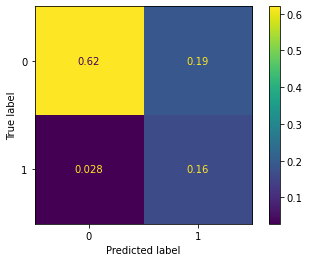

In [7]:
# generate reposrting score

from sklearn.metrics import f1_score, classification_report, confusion_matrix,plot_confusion_matrix
# Classification Report and f1-score
print(classification_report(y_test, y_pred))
print('The F1-score for Quote_Flag = 1 is {:.4f}'.format(f1_score(y_test, y_pred, pos_label=1)))
# Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)
plot_confusion_matrix(clf, X_test, y_test, normalize = 'all');


In [1]:
# export the prediction result for 
DATAFILE2 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_test.csv'
a3test = pd.read_csv(DATAFILE2)
dummy_list = []
for i in y_pred:
    dummy_list = np.append(dummy_list, i)

data = {
    'Quote_Id': a3test['Quote_Id'],
    'Quote_Flag': dummy_list
    }
df = pd.DataFrame(data)
df.to_csv('D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\ensemble\\MLP_u.csv')

NameError: name 'pd' is not defined

### AUC for kaggle
To save time, AUC performance needs to be checked before use to predict for kaggle.
Only AUC > 0.85 worth for kaggle

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
# auc
y_probs_class_1 = y_probs[:,1]
auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc))

The AUC is 0.884


In [9]:
# import the unknown data and fit in the classifier for prediction

DATAFILE3 = 'C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\a3k-clean_m.csv'
a3kaggle = pd.read_csv(DATAFILE3)
a3kaggle1 = a3kaggle[[col for col in a3kaggle.columns if col != 'Unnamed: 0' and col != 'Quote_Id']]

y_pred_K = clf.predict(a3kaggle1)

In [10]:
dummy_list = []
for i in y_pred_K:
    dummy_list = np.append(dummy_list, i)

data = {
    'Quote_Id': a3kaggle['Quote_Id'],
    'Quote_Flag': dummy_list
    }
df = pd.DataFrame(data)

In [31]:
df.head()

,Quote_Id,Quote_Flag
0,1,0.0
1,4,0.0
2,5,0.0
3,7,0.0
4,8,0.0


In [11]:
df.to_csv('C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\UTS_32130_10620084.csv')